# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d austinreese/craigslist-carstrucks-data
# !unzip '*.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
pd.set_option('display.max_columns', 100)

df = pd.read_csv('./vehicles.csv')
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [7]:
df.describe()

# 평균가격 약 4만달러정도 근데 상위25%가 약 21000달라정도 이상치가 많은것 같음
# 0원인것도 있어, 잘 걸러내야함

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
# 'year'는 연식을 나타내는 age컬럼으로 변경

ages = 2022 - df['year']
df['age'] = ages


df = df.drop(['Unnamed: 0', 'id','url', 'region_url', 'VIN','lat', 'long', 
              'image_url', 'description', 'state', 'posting_date', 'year'], axis=1)

In [10]:
df.shape

(458213, 15)

### 문제 5. 범주형 데이터의 통계 분석하기


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  age           457163 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 52.4+ MB


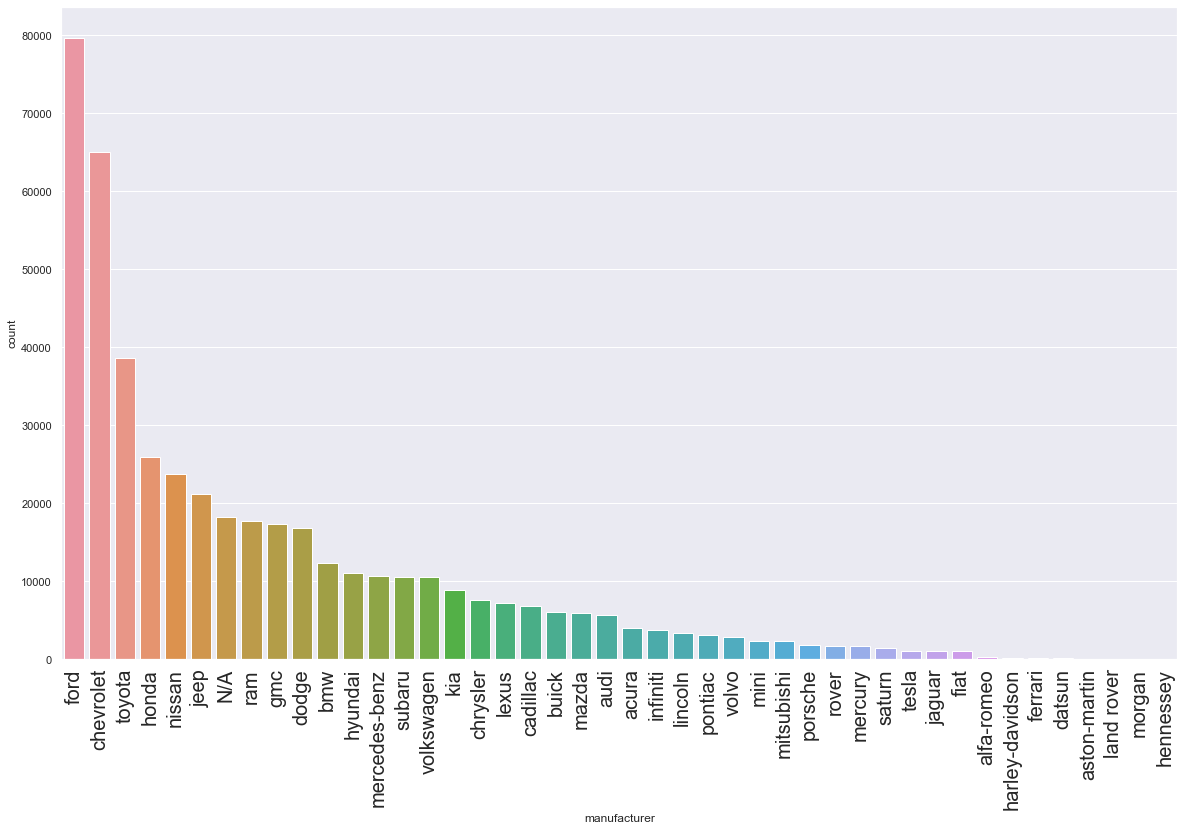

In [12]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기

sns.set(rc = {'figure.figsize' : (20, 12)})
sns.countplot(x='manufacturer', data=df.fillna('N/A'), order=df['manufacturer'].fillna('N/A').value_counts().index)
plt.xticks(rotation=90, fontsize=20)
plt.show()

# 포드 / 쉐보레 많아 미국 중고차 시장이라 (미국 입장에서 국산차라)

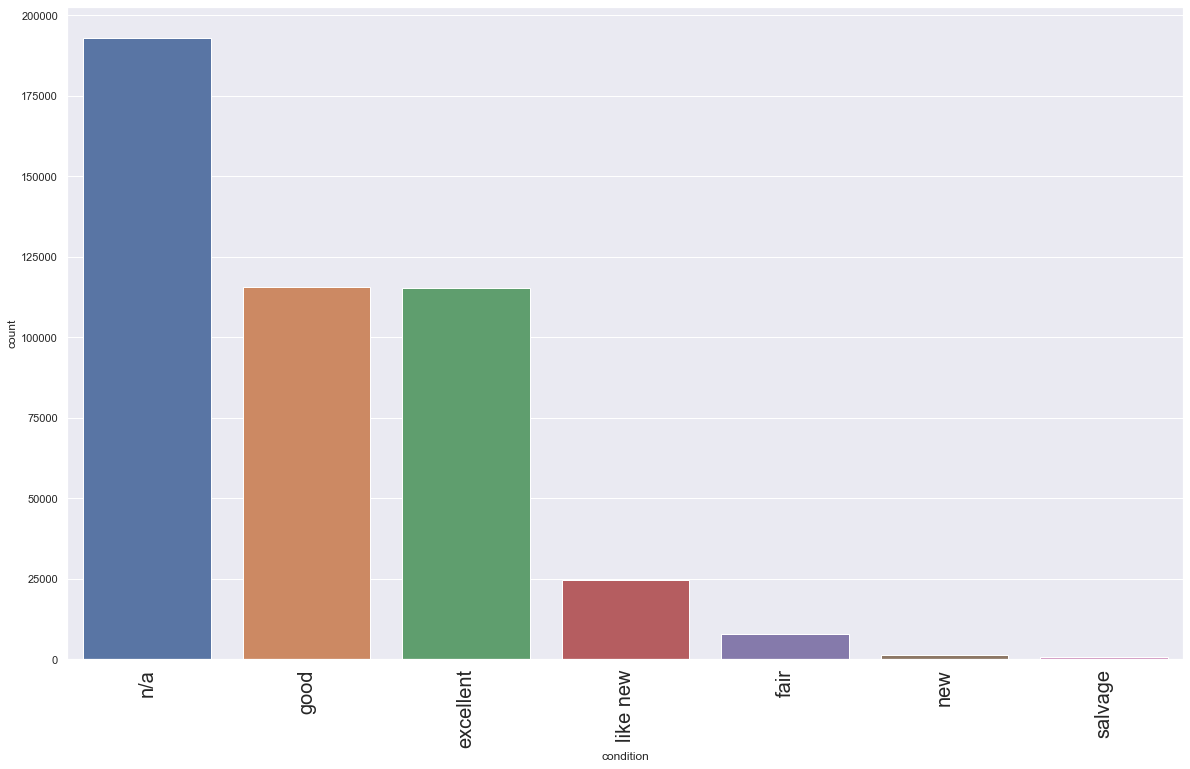

In [13]:
sns.set(rc = {'figure.figsize' : (20, 12)})
sns.countplot(x='condition', data=df.fillna('n/a'), order=df['condition'].fillna('n/a').value_counts().index)
plt.xticks(rotation=90, fontsize=20)
plt.show()

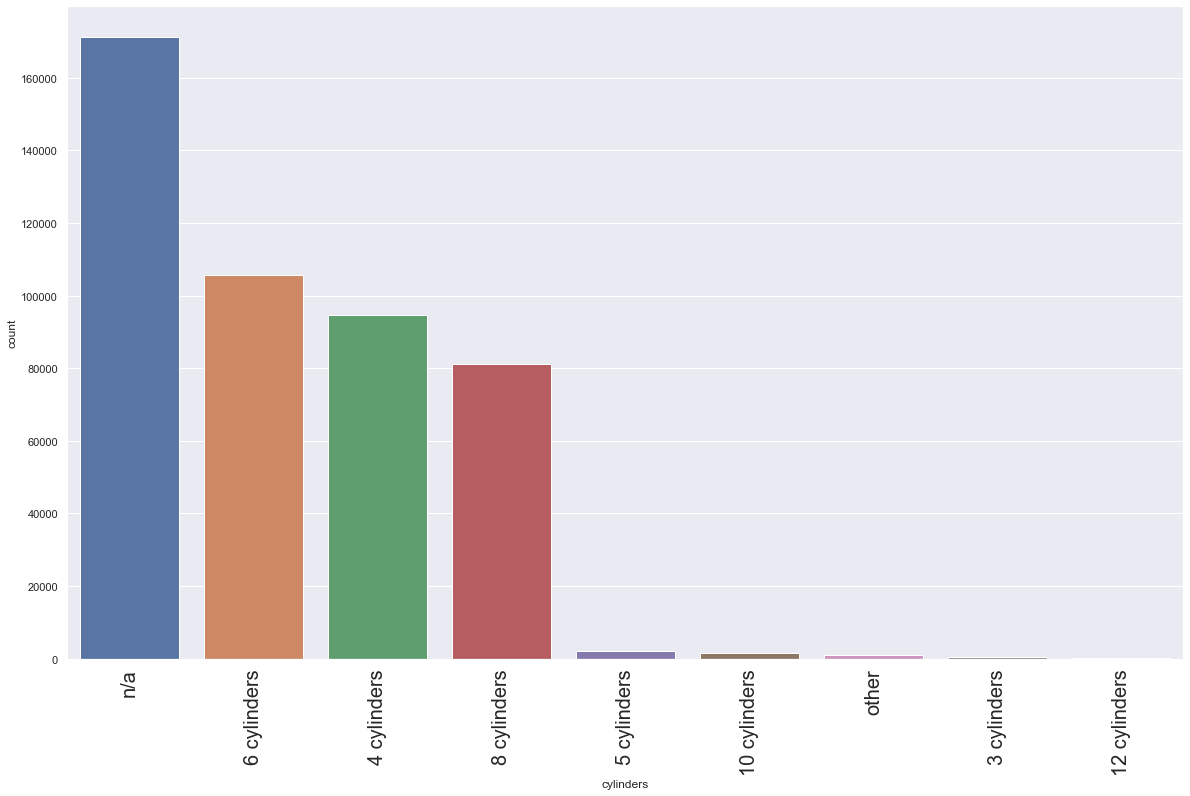

In [14]:
sns.set(rc = {'figure.figsize' : (20, 12)})
sns.countplot(x='cylinders', data=df.fillna('n/a'), order=df['cylinders'].fillna('n/a').value_counts().index)
plt.xticks(rotation=90, fontsize=20)
plt.show()

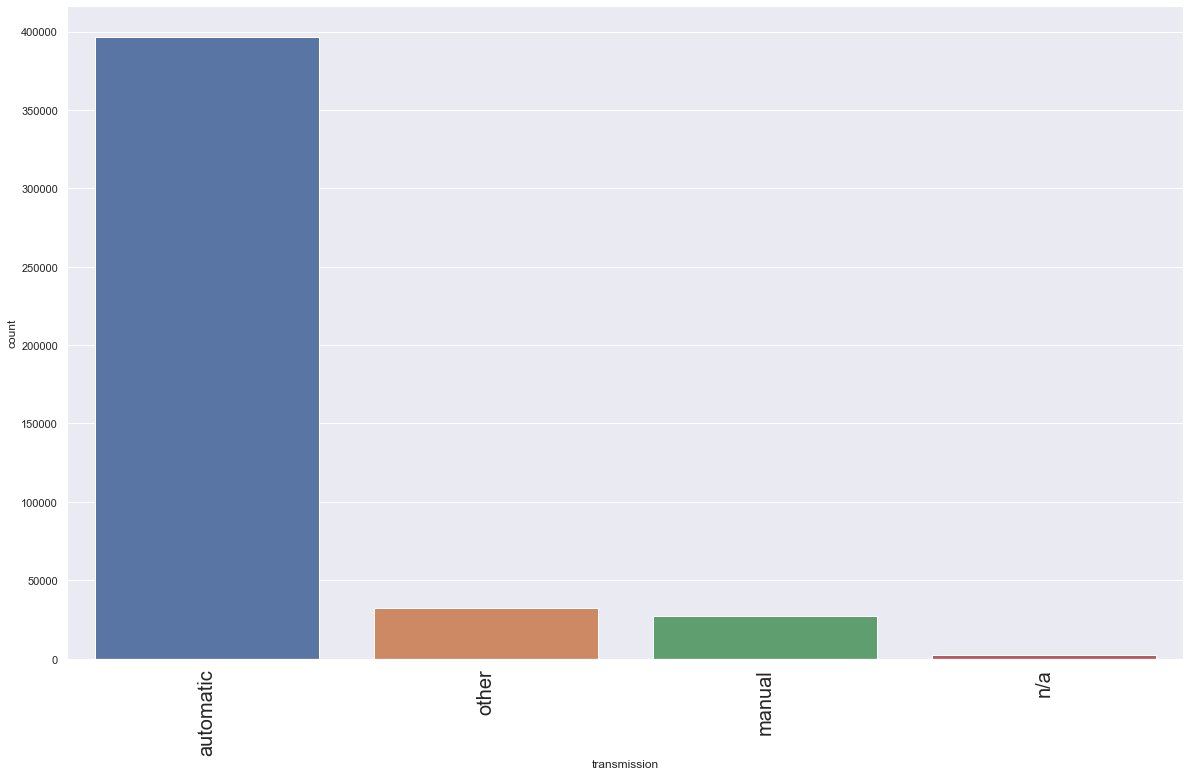

In [15]:
sns.set(rc = {'figure.figsize' : (20, 12)})
sns.countplot(x='transmission', data=df.fillna('n/a'), order=df['transmission'].fillna('n/a').value_counts().index)
plt.xticks(rotation=90, fontsize=20)
plt.show()

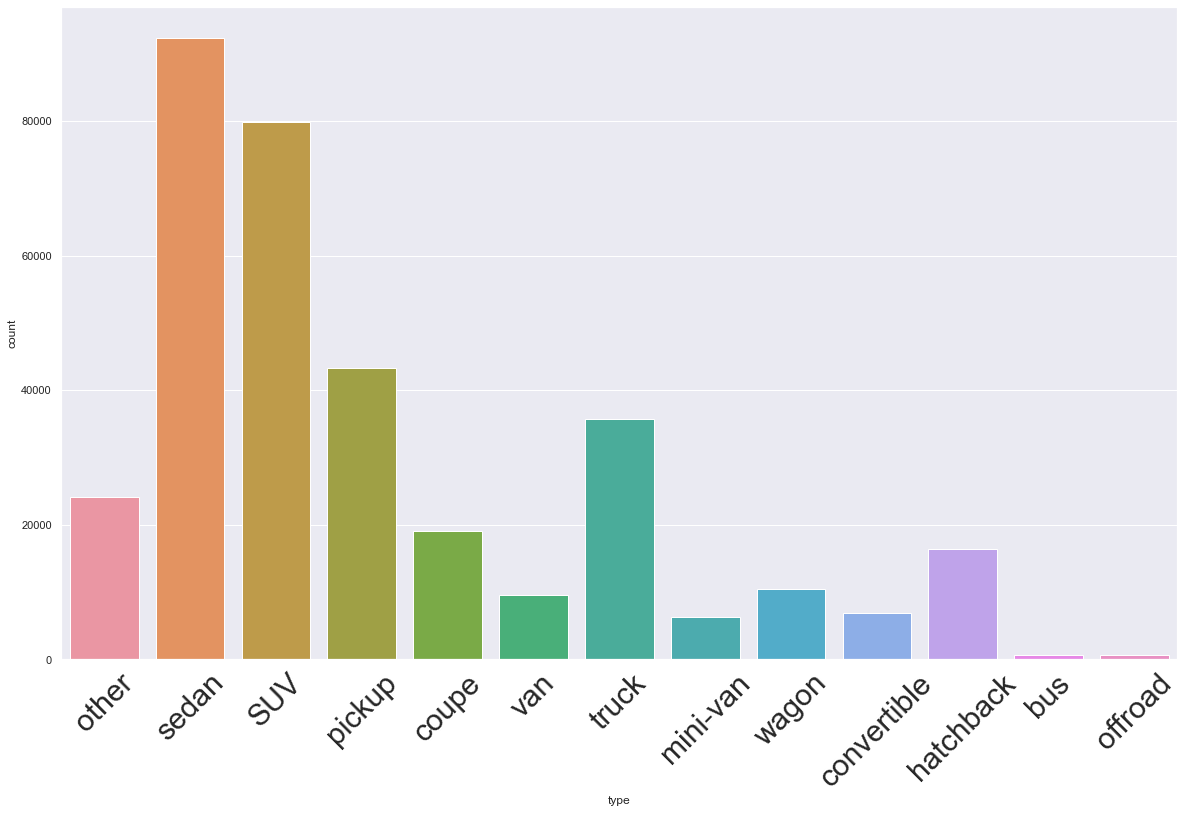

In [16]:
sns.countplot(x='type', data=df)
plt.xticks(rotation=45, fontsize=30)
plt.show()

# SUV가 제일 많고 그다음 sedan 미국이라 pickup 트럭도 많음


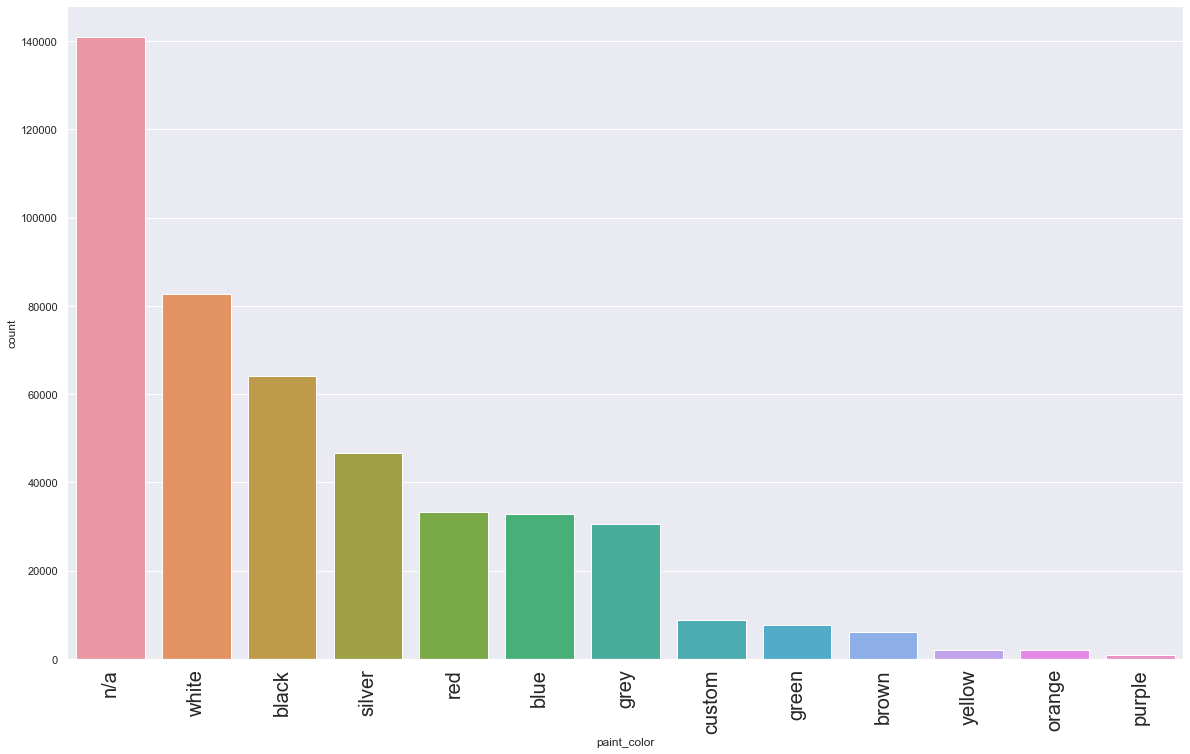

In [17]:
sns.set(rc = {'figure.figsize' : (20, 12)})
sns.countplot(x='paint_color', data=df.fillna('n/a'), order=df['paint_color'].fillna('n/a').value_counts().index)
plt.xticks(rotation=90, fontsize=20)
plt.show()

In [18]:
df['model'].value_counts()

f-150                                              8370
silverado 1500                                     5964
1500                                               4211
camry                                              4033
accord                                             3730
                                                   ... 
x3 xdrive28i awd only 64k leather pano 2 owners       1
golf cart  club car                                   1
equinox lt fwd gas suv                                1
cst/20                                                1
Genesis 3.8                                           1
Name: model, Length: 31520, dtype: int64

### 문제 6. 수치형 데이터의 통계 분석하기

In [19]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기

df.describe()
# 연식 1927년 ~ 2021년

,price,odometer,age
count,4.582130e+05,4.029100e+05,457163.000000
mean,4.042093e+04,1.016698e+05,11.253933
std,8.194599e+06,3.228623e+06,8.868136
min,0.000000e+00,0.000000e+00,1.000000
25%,4.900000e+03,4.087700e+04,6.000000
50%,1.099500e+04,8.764100e+04,9.000000
75%,2.149500e+04,1.340000e+05,14.000000
max,3.615215e+09,2.043756e+09,122.000000


<AxesSubplot:xlabel='price'>

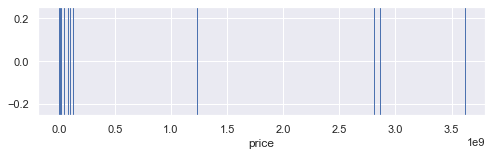

In [20]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

<AxesSubplot:xlabel='age', ylabel='Count'>

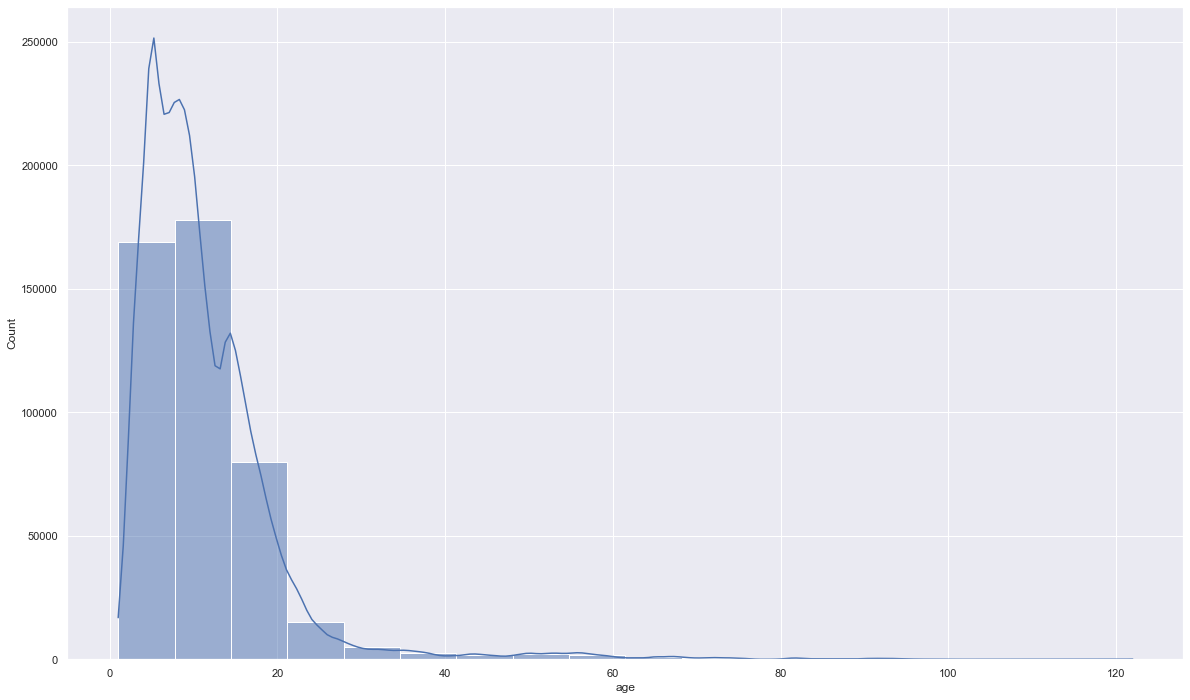

In [21]:
sns.histplot(x='age', data=df, bins=18, kde=True)

<AxesSubplot:xlabel='odometer'>

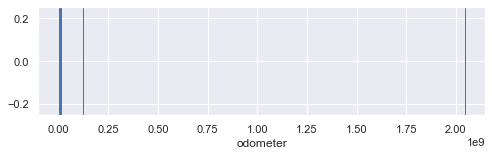

In [22]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

<AxesSubplot:xlabel='manufacturer', ylabel='price'>

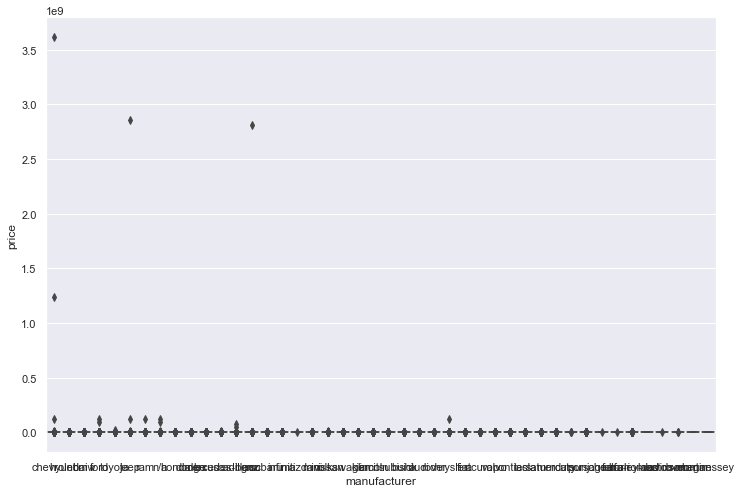

In [23]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기

fig = plt.figure(figsize=(12,8))
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

### 문제 8. 범주형 데이터 클리닝하기

In [24]:
# 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정하여 채워넣기) 

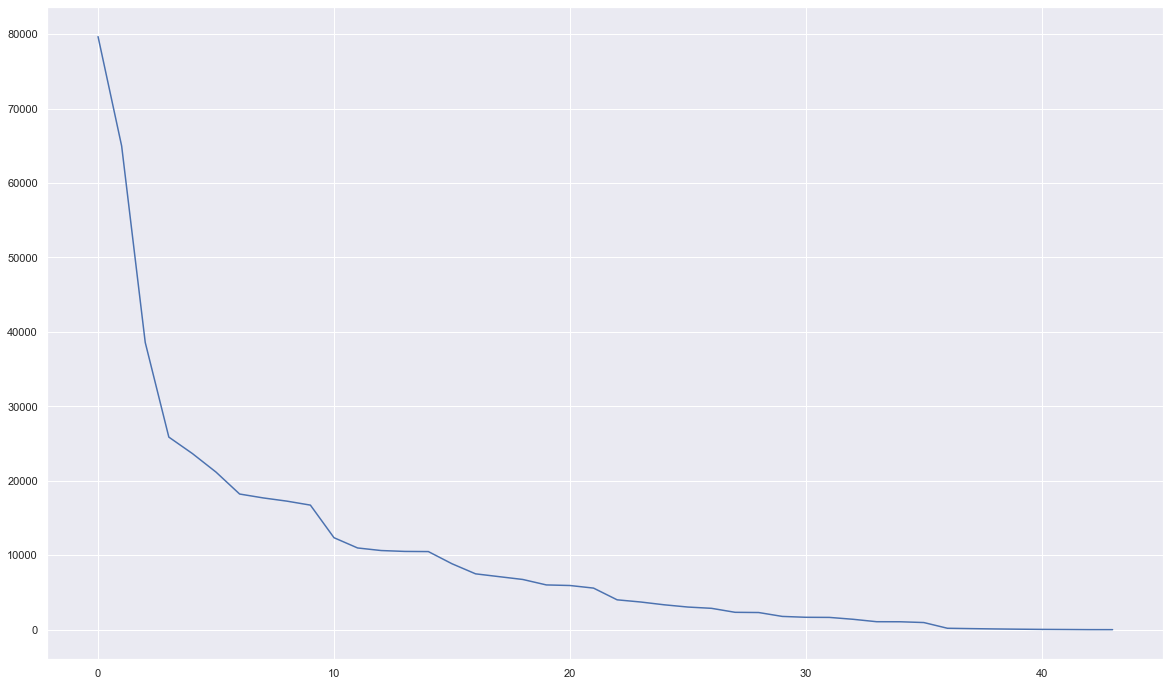

In [25]:
# manufacturer : 10번쨰 이하 부터는 others로 묶기!

col = 'manufacturer'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts)), counts)

In [26]:
# manufacturer : 10번쨰 이하 부터는 others로 묶기!

n_categorical = 10
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

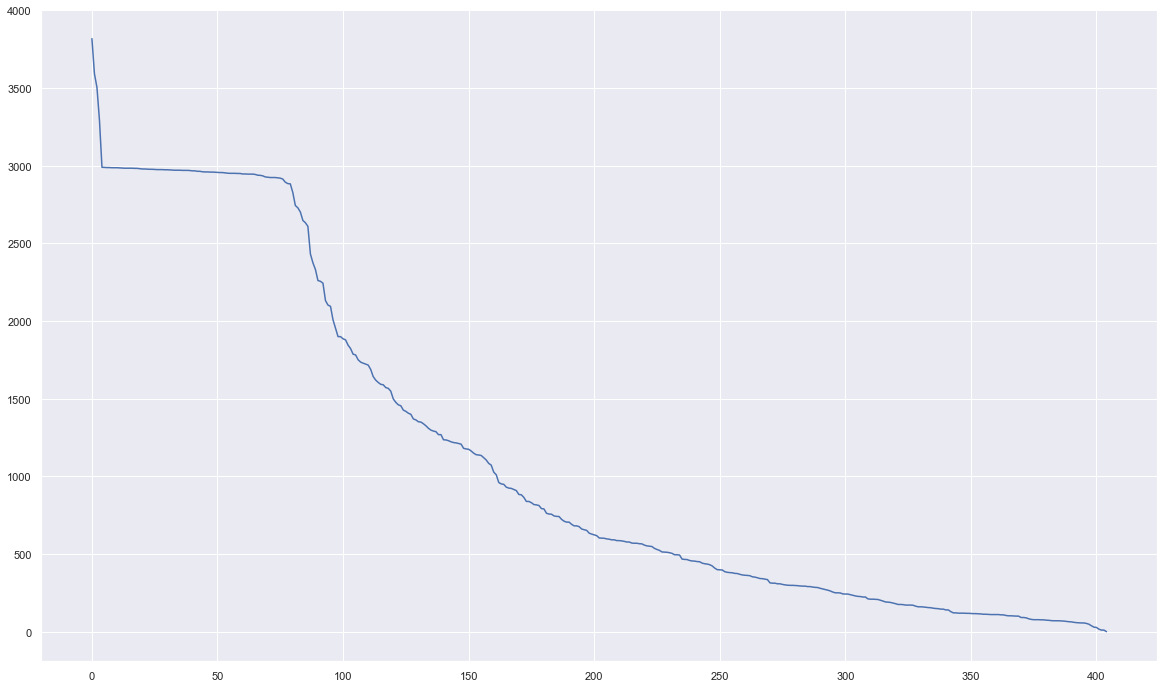

In [27]:
# region : 10번쨰 이하 부터는 others로 묶기!
col = 'region'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts)), counts)
plt.grid('on')

In [28]:
# region : 10번쨰 이하 부터는 others로 묶기!

n_categorical = 5
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

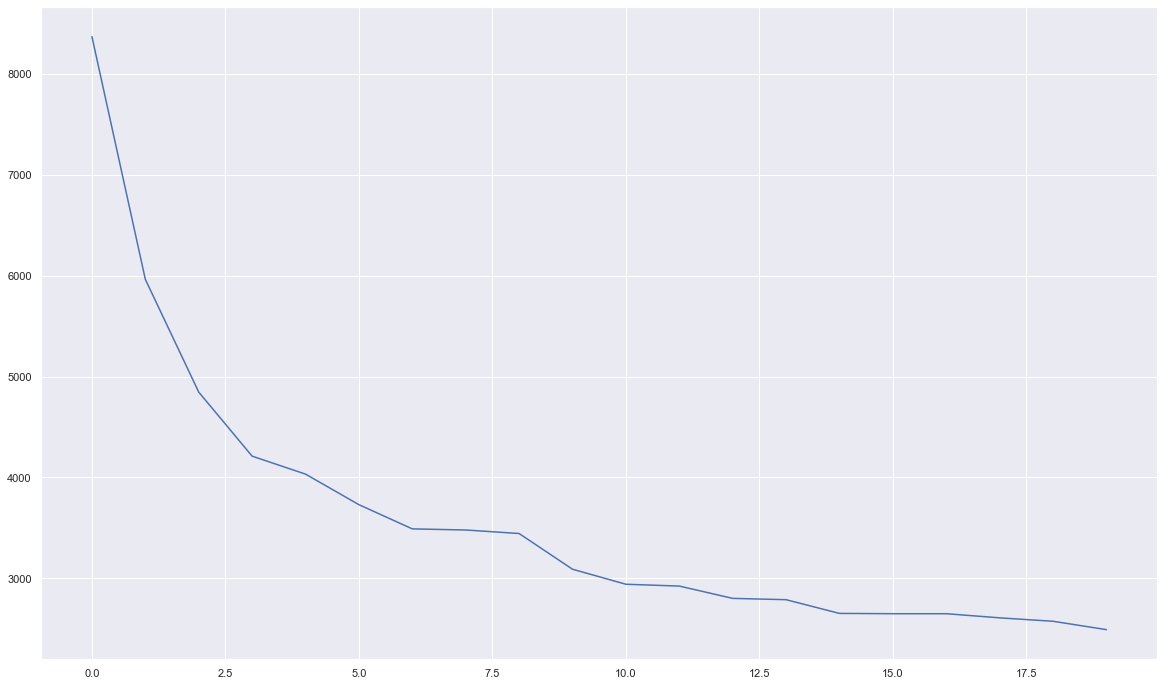

In [29]:
# model : 10번쨰 이하 부터는 others로 묶기!
col = 'model'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')
# model은 10개로 짤라?

In [30]:
# model : 10번쨰 이하 부터는 others로 묶기!

n_categorical = 10
model_lists = counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in model_lists else 'others')
df[col].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

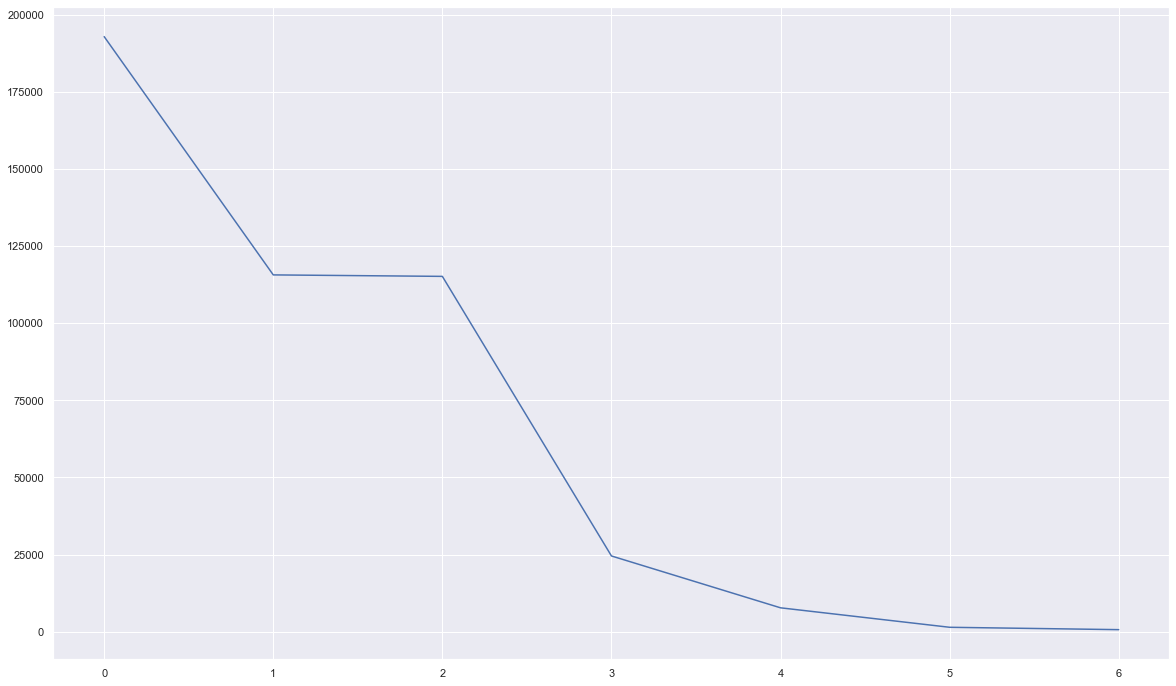

In [31]:
# condition : 3번쨰 이하 부터는 others로 묶기!
col = 'condition'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')


In [32]:
# condition : 3번쨰 이하 부터는 others로 묶기!

n_categorical = 3
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

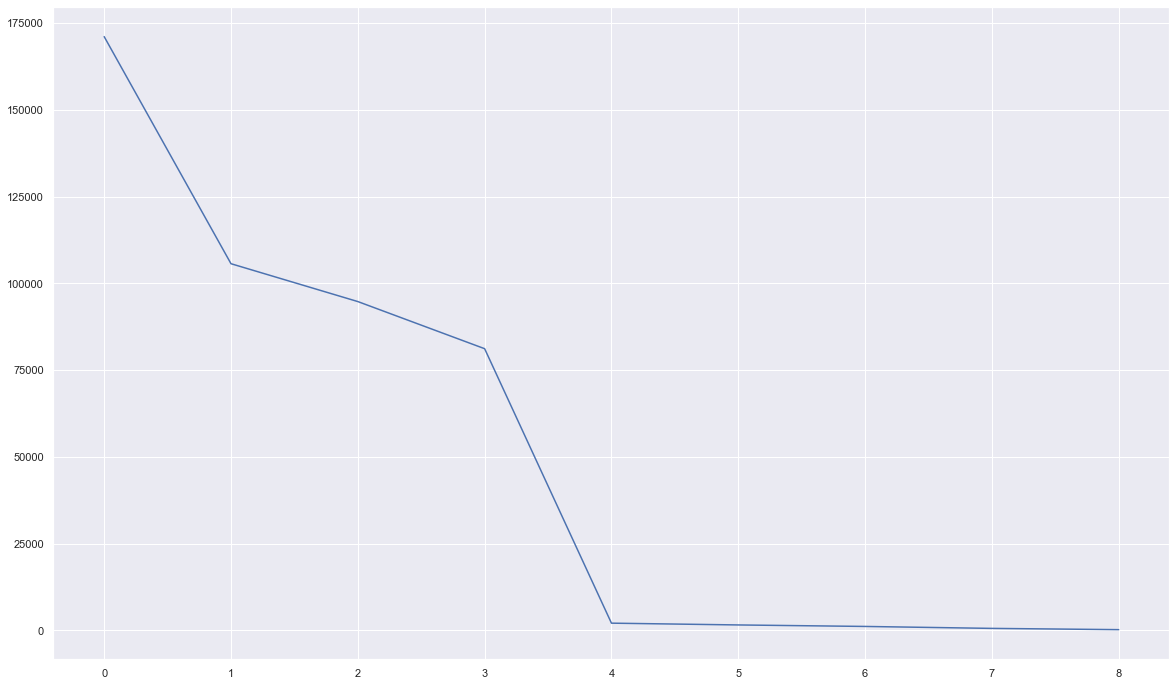

In [33]:
# cylinders : 4번쨰 이하 부터는 others로 묶기!
col = 'cylinders'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')

In [34]:
# cylinders : 4번쨰 이하 부터는 others로 묶기!
n_categorical = 4
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

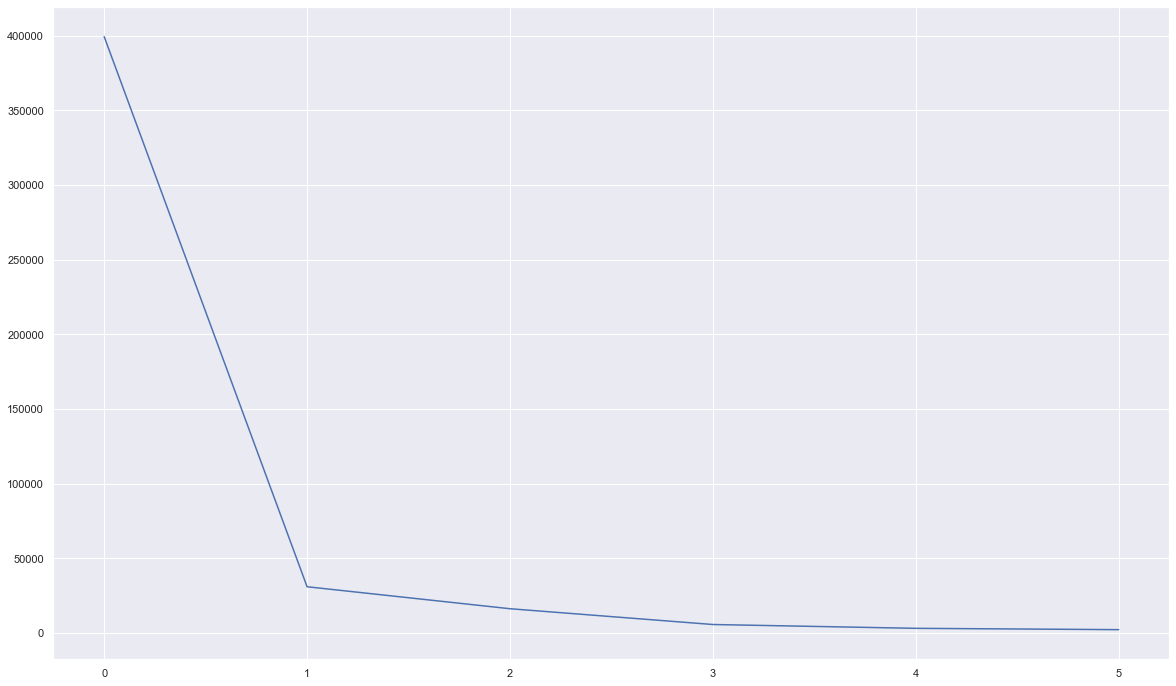

In [35]:
# fuel : 3번쨰 이하 부터는 others로 묶기!
col = 'fuel'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')

In [36]:
# fuel : 2번쨰 이하 부터는 others로 묶기!
# Other이 이미 존재하기 때문에 그 뒤에 애들 + other => others로 합침
n_categorical = 2
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

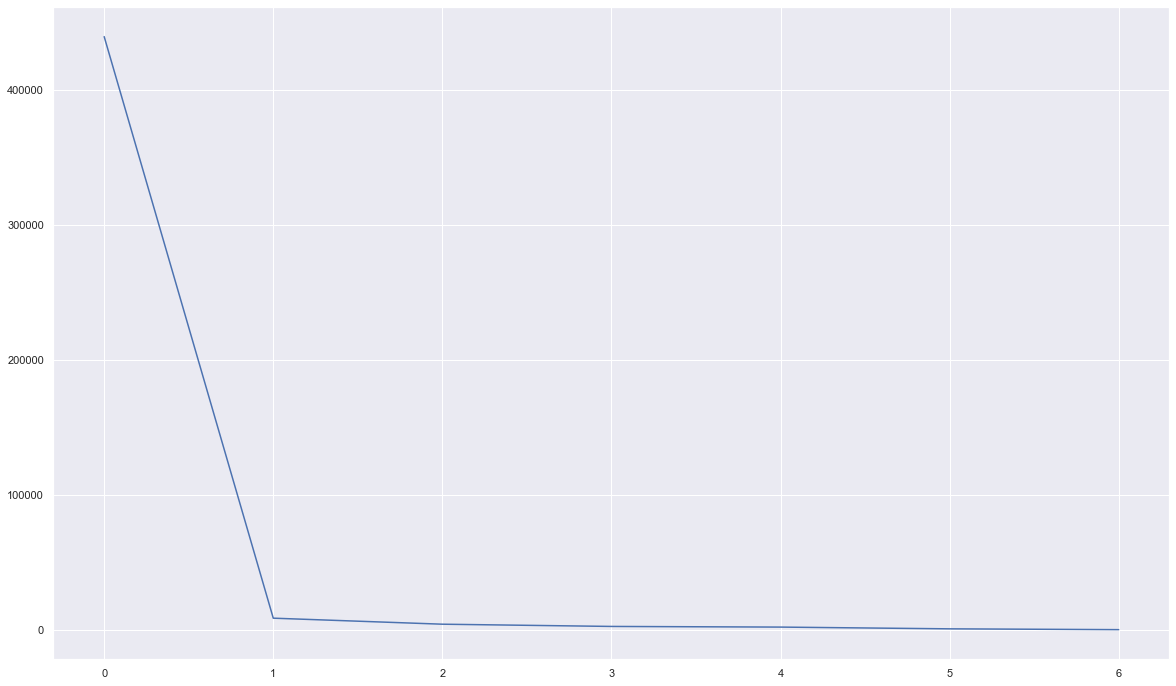

In [37]:
# title_status 없애버려
col = 'title_status'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')

In [38]:
df.drop('title_status', axis=1, inplace=True)

In [39]:
# Transmission 자동 수동 other 그냥 그대로 둬도 될듯 (2442개 NA 존재했음 => other 변경)
print(df['transmission'].value_counts())
df['transmission'].fillna('other', inplace=True)
print(df['transmission'].value_counts())

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64
automatic    396322
other         34628
manual        27263
Name: transmission, dtype: int64


In [40]:
# Drive 그냥 둬도 될듯 - fillna만 134188개
print(df['drive'].value_counts())
print()
df['drive'].fillna('others', inplace=True)
print(df['drive'].value_counts())

4wd    139693
fwd    122602
rwd     61730
Name: drive, dtype: int64

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64


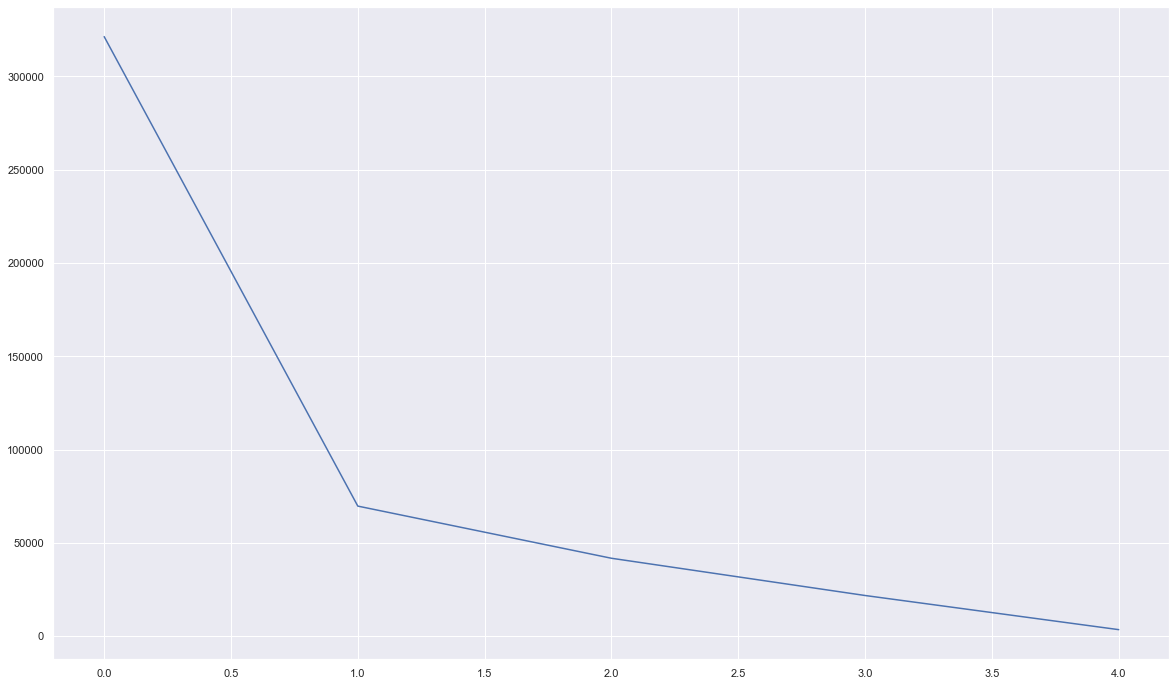

In [41]:
col = 'size'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')

In [42]:
# size : 3번쨰 이하 부터는 others로 묶기!
n_categorical = 2
counts.index[n_categorical:]
df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

others         112738
sedan           92364
SUV             79882
pickup          43343
truck           35694
other           24160
coupe           19106
hatchback       16388
wagon           10473
van              9574
convertible      6864
mini-van         6263
bus               717
offroad           647
Name: type, dtype: int64


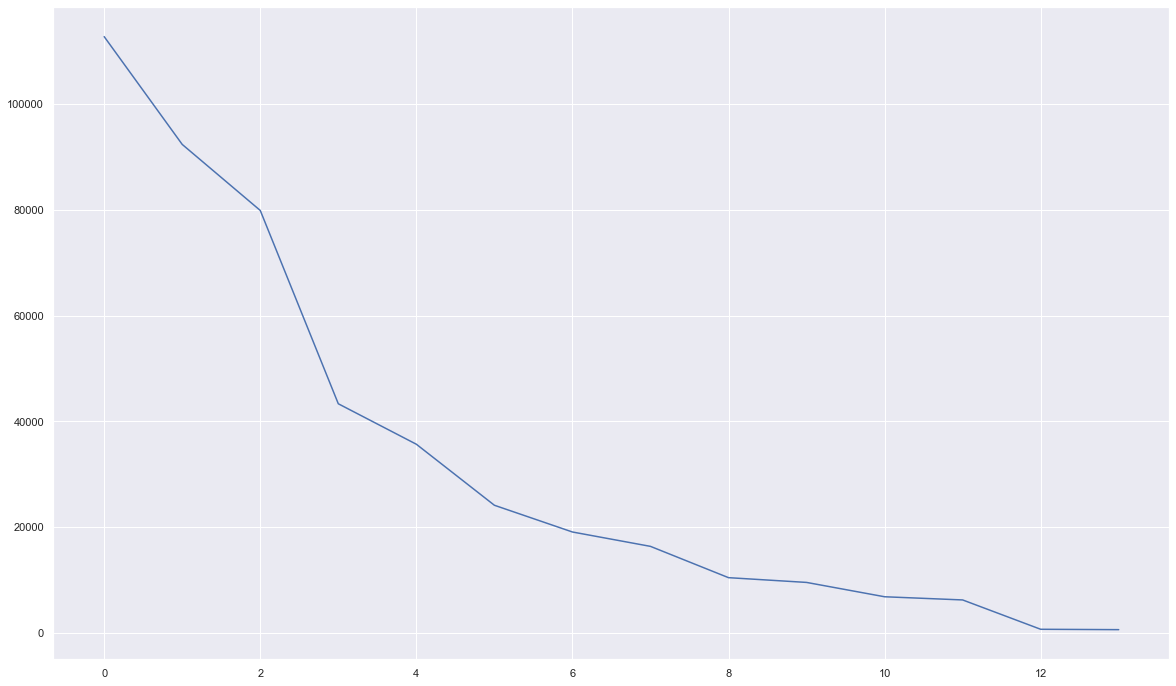

In [43]:
col = 'type'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')
print(counts)

# other + others 합치기
df.loc[df[col] == 'other', col] = 'others'

In [44]:
df['type'].value_counts()

sedan          92364
SUV            79882
pickup         43343
truck          35694
others         24160
coupe          19106
hatchback      16388
wagon          10473
van             9574
convertible     6864
mini-van        6263
bus              717
offroad          647
Name: type, dtype: int64

In [45]:
n_categorical = 7

df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

sedan     92364
SUV       79882
others    75086
pickup    43343
truck     35694
coupe     19106
Name: type, dtype: int64

In [46]:
df['type'].value_counts()

sedan     92364
SUV       79882
others    75086
pickup    43343
truck     35694
coupe     19106
Name: type, dtype: int64

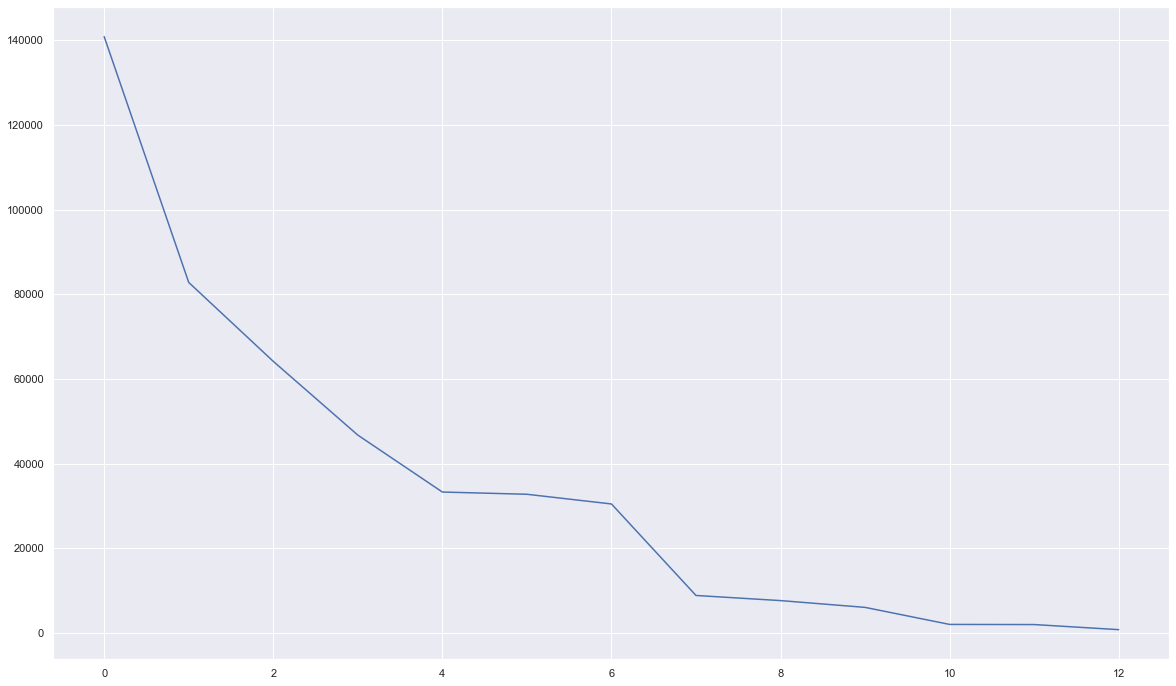

In [47]:
col = 'paint_color'
counts = df[col].fillna('others').value_counts()

plt.plot(range(len(counts[:20])), counts[:20])
plt.grid('on')

In [48]:
n_categorical = 7

df[col] = df[col].apply(lambda x: x if str(x) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [49]:
df.isna().sum()

region               0
price                0
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
transmission         0
drive                0
size            321348
type            112738
paint_color     140843
age               1050
dtype: int64

In [50]:
# others 포함 안된 NA 다 바꿔주기
df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'size', 'type', 'paint_color']]=df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'size', 'type', 'paint_color']].fillna('others')

In [51]:
df.isna().sum()

region              0
price               0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer        55303
transmission        0
drive               0
size                0
type                0
paint_color         0
age              1050
dtype: int64

### 문제 9. 수치형 데이터 시각화하여 분석하기

<AxesSubplot:xlabel='price'>

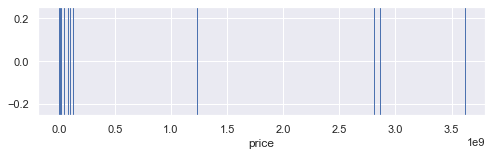

In [52]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

<AxesSubplot:xlabel='odometer'>

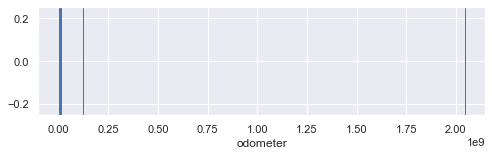

In [53]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=1)

<AxesSubplot:xlabel='age', ylabel='Count'>

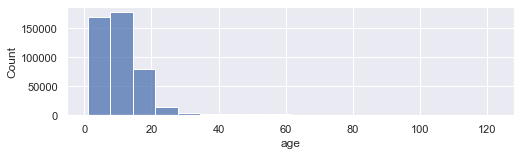

In [54]:
fig = plt.figure(figsize=(8, 2))
sns.histplot(x='age', data=df, bins=18)

### 문제 10. 수치형 데이터 클리닝하기

In [55]:
# quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기

p1 = df['price'].quantile(0.99) # 상위 1%
p2 = df['price'].quantile(0.1) # 하위 10%

print(p1, p2)

59900.0 651.0


In [56]:
o1 = df['odometer'].quantile(0.99) # 상위 1%
o2 = df['odometer'].quantile(0.03) # 하위 0.3%

print(o1, o2)

270000.0 2760.0


In [57]:
df = df[(p1 > df['price']) & (df['price'] > p2)]
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]
df.describe()

# mean과 median이 비슷하면 이상치 클리닝 어느정도 된것!!!

,price,odometer,age
count,348747.000000,348747.000000,347958.000000
mean,16280.568194,96161.308946,10.795676
std,11815.834237,58124.975038,7.302071
min,652.000000,2762.000000,1.000000
25%,6950.000000,46410.000000,6.000000
50%,13000.000000,92539.000000,9.000000
75%,23211.000000,137016.500000,14.000000
max,59895.000000,269930.000000,122.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'chevrolet'),
  Text(1, 0, 'others'),
  Text(2, 0, 'ford'),
  Text(3, 0, 'toyota'),
  Text(4, 0, 'jeep'),
  Text(5, 0, 'ram'),
  Text(6, 0, 'honda'),
  Text(7, 0, 'dodge'),
  Text(8, 0, 'gmc'),
  Text(9, 0, 'nissan')])

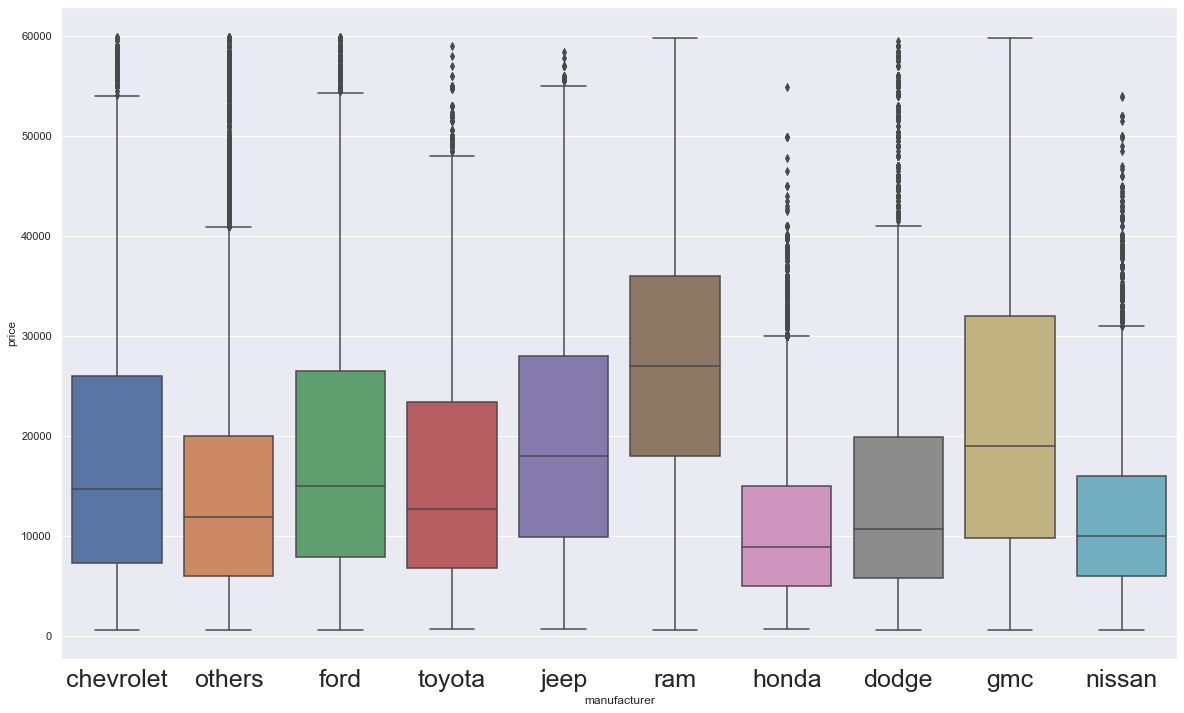

In [64]:
# 이제 어느정도 정상적으로 나옴! 수치형 데이터 클리닝하니까 (각 제조사마다 가격 너무 비싼게 많아 보임)

sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(fontsize=25)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'f-150'),
  Text(2, 0, 'camry'),
  Text(3, 0, 'silverado 1500'),
  Text(4, 0, 'silverado'),
  Text(5, 0, 'altima'),
  Text(6, 0, 'civic'),
  Text(7, 0, '1500'),
  Text(8, 0, 'escape'),
  Text(9, 0, 'accord')])

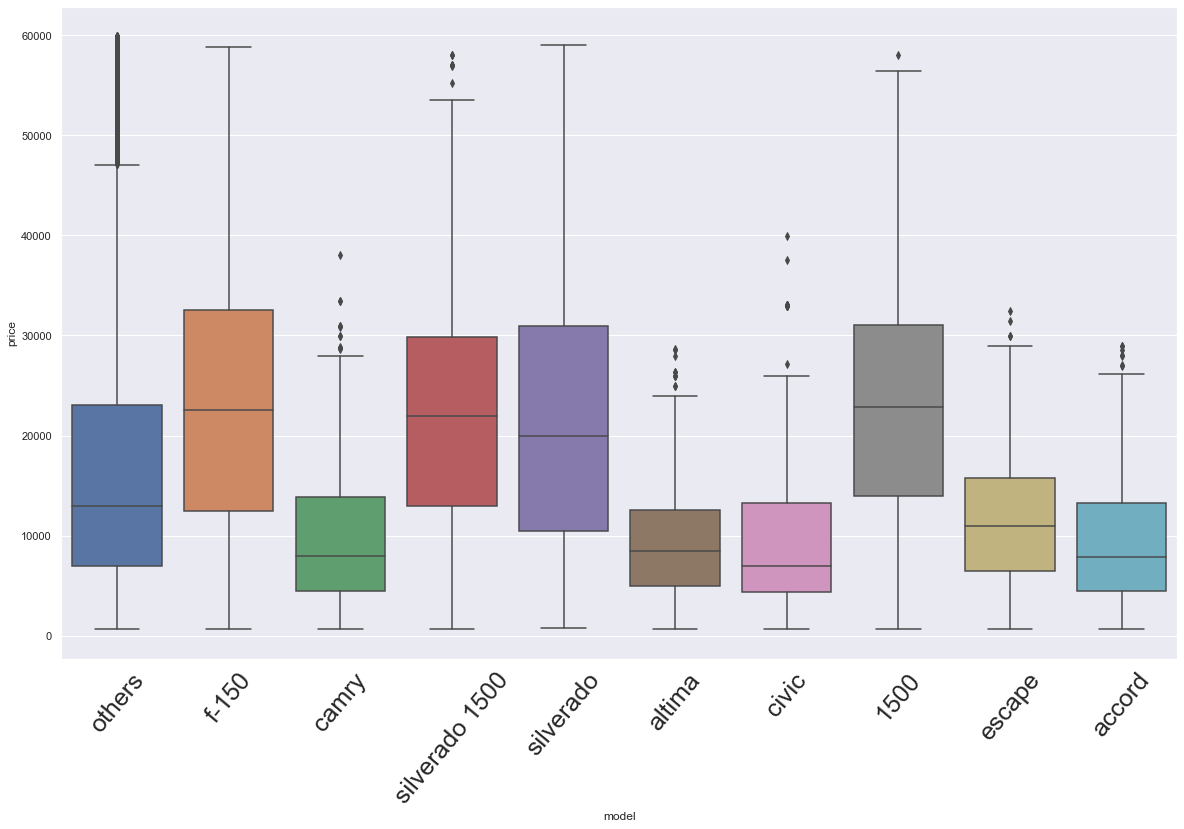

In [66]:
sns.boxplot(x='model', y='price', data=df)
plt.xticks(fontsize=25, rotation=50)

(array([0, 1, 2, 3]),
 [Text(0, 0, '8 cylinders'),
  Text(1, 0, '4 cylinders'),
  Text(2, 0, '6 cylinders'),
  Text(3, 0, 'others')])

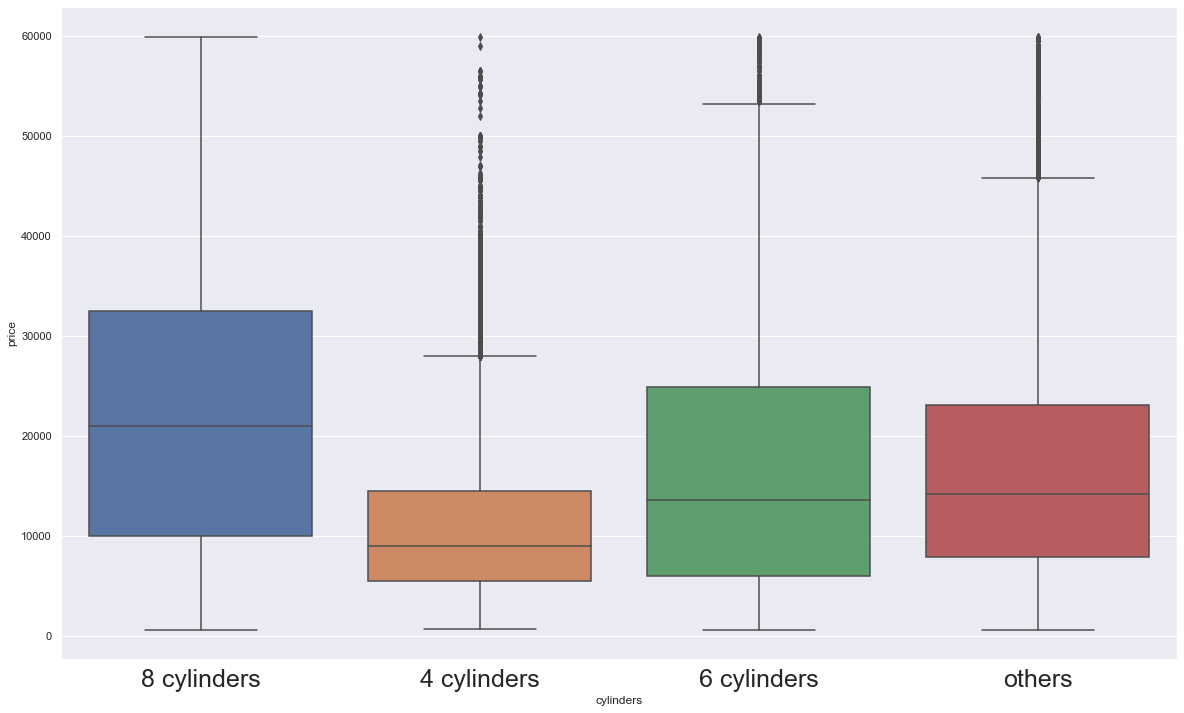

In [67]:
sns.boxplot(x='cylinders', y='price', data=df)
plt.xticks(fontsize=25)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'SUV'),
  Text(3, 0, 'pickup'),
  Text(4, 0, 'coupe'),
  Text(5, 0, 'truck')])

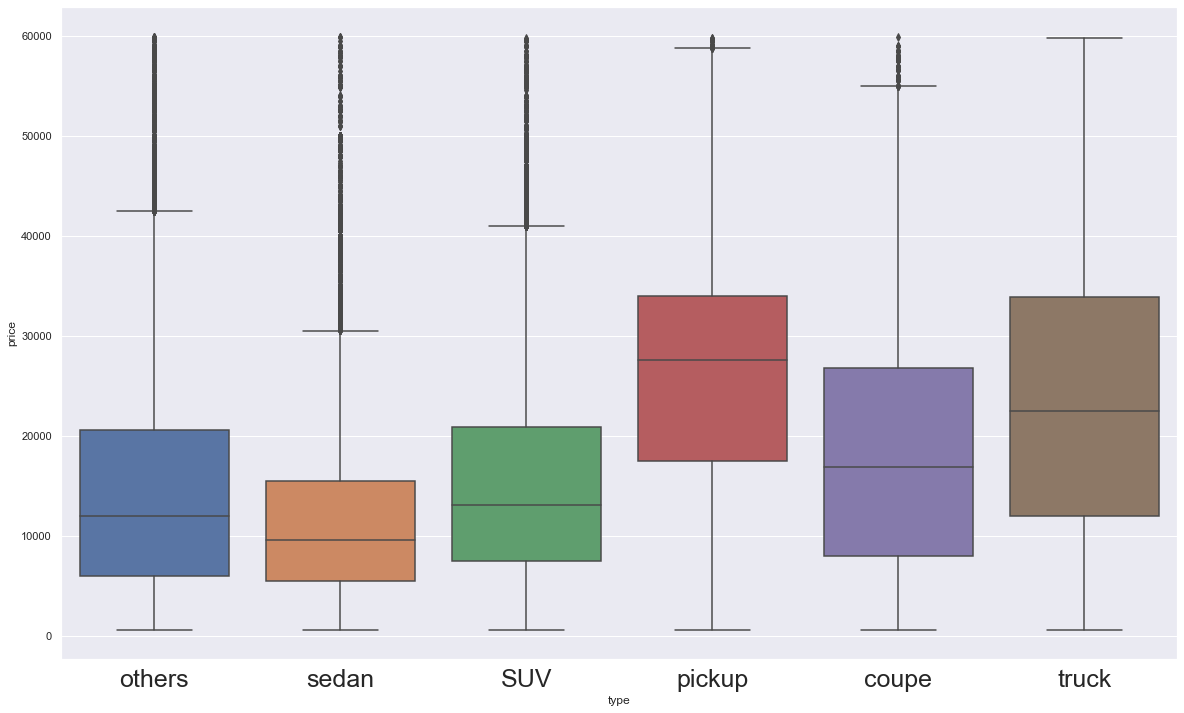

In [69]:
sns.boxplot(x='type', y='price', data=df)
plt.xticks(fontsize=25)

### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

<AxesSubplot:>

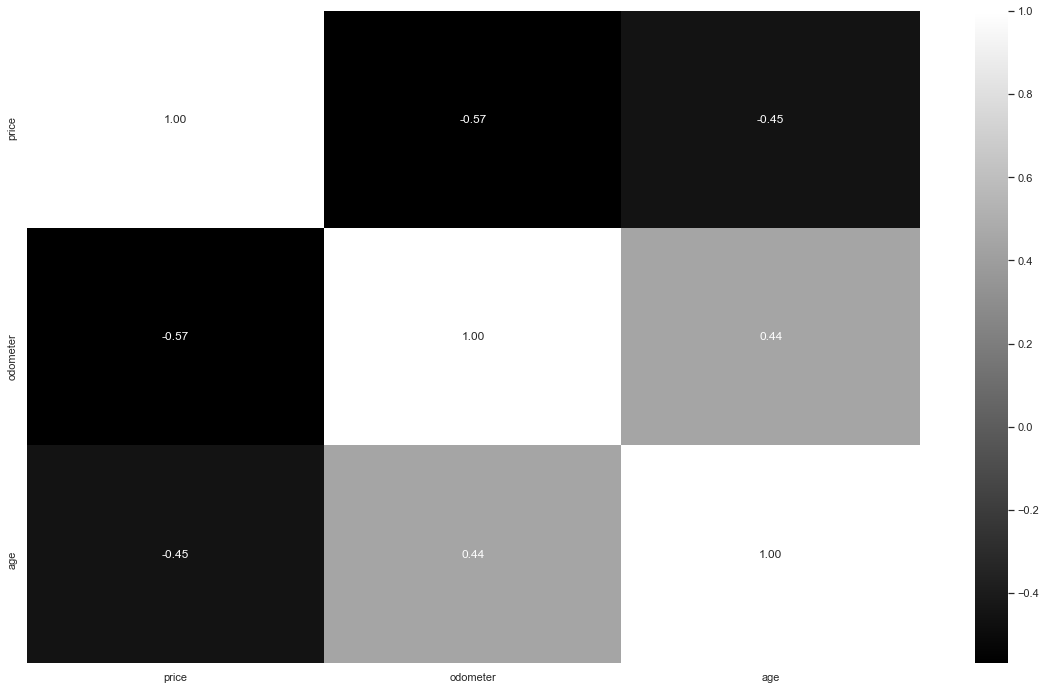

In [71]:
# odometer / age 높을수록 price 가격 떨어짐 (상식이랑 똑같음)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='gray')

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348747 entries, 0 to 458212
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        348747 non-null  object 
 1   price         348747 non-null  int64  
 2   manufacturer  348747 non-null  object 
 3   model         348747 non-null  object 
 4   condition     348747 non-null  object 
 5   cylinders     348747 non-null  object 
 6   fuel          348747 non-null  object 
 7   odometer      348747 non-null  float64
 8   transmission  348747 non-null  object 
 9   drive         348747 non-null  object 
 10  size          348747 non-null  object 
 11  type          348747 non-null  object 
 12  paint_color   348747 non-null  object 
 13  age           347958 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 48.0+ MB


In [86]:
str(type(df['price'][0]))

"<class 'numpy.int64'>"

In [89]:
# num & categires 나누기

categories = []
nums = []
for col in df.columns:
    if str(type(df[col][0])) == "<class 'str'>":
        categories.append(col)
    elif str(type(df[col][0])) == "<class 'numpy.float64'>":
        nums.append(col)
    elif str(type(df[col][0])) == "<class 'numpy.int64'>":
        nums.append(col)
print(f'-- Categories Columns --\n {categories}')
print(f'-- Numeric Columns --\n {nums}')

-- Categories Columns --
 ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']
-- Numeric Columns --
 ['price', 'odometer', 'age']


In [58]:
from sklearn.preprocessing import StandardScaler

In [92]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()

X_num = pd.DataFrame(scaler.fit_transform(df[nums]), columns=df[nums].columns, index=df[nums].index)

# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = pd.get_dummies(df[categories], drop_first=True)

# 입출력 데이터 통합하기
X = pd.concat([X_num, X_cat], axis=1).drop('price', axis=1)
y = df['price']

display(X.head())
print(y.head())

,odometer,age,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_good,condition_others,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_gas,fuel_others,transmission_manual,transmission_other,drive_fwd,drive_others,drive_rwd,size_others,type_coupe,type_others,type_pickup,type_sedan,type_truck,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.091087,0.164929,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0
1,-0.044066,-0.382861,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2,-0.156823,0.712720,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1.614432,5.095044,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,0.341311,0.849667,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


0    35990
1     7500
2     4900
3     2000
4    19500
Name: price, dtype: int64


In [97]:
# age 빈값 존재 => 평균으로 채워주기 (scale 했으니 0으로 하면 됨)

print(X.isna().sum())

X['age'] = X['age'].fillna(0.0)

odometer                   0
age                      789
region_fayetteville        0
region_jacksonville        0
region_others              0
region_rochester           0
region_springfield         0
manufacturer_dodge         0
manufacturer_ford          0
manufacturer_gmc           0
manufacturer_honda         0
manufacturer_jeep          0
manufacturer_nissan        0
manufacturer_others        0
manufacturer_ram           0
manufacturer_toyota        0
model_accord               0
model_altima               0
model_camry                0
model_civic                0
model_escape               0
model_f-150                0
model_others               0
model_silverado            0
model_silverado 1500       0
condition_good             0
condition_others           0
cylinders_6 cylinders      0
cylinders_8 cylinders      0
cylinders_others           0
fuel_gas                   0
fuel_others                0
transmission_manual        0
transmission_other         0
drive_fwd     

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [103]:
from sklearn.model_selection import train_test_split

In [104]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train : \n{X_train.shape}')
print(f'X_test : \n{X_test.shape}')

X_train : 
(244122, 49)
X_test : 
(104625, 49)


## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [105]:
from xgboost import XGBRegressor

In [106]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [108]:
model_reg.score(X_test, y_test)

0.8249370260478652

### 문제 15. 모델 학습 결과 평가하기

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [112]:
y.mean()

16280.568194135003

In [113]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred = model_reg.predict(X_test)


print('MAE', mean_absolute_error(y_test, pred))
print('RMSE', sqrt(mean_squared_error(y_test, pred)))


# y 평균값이 :16280$
# RMSE 에러값 :4952$ 

MAE 3260.2709778252424
RMSE 4952.011530129718


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


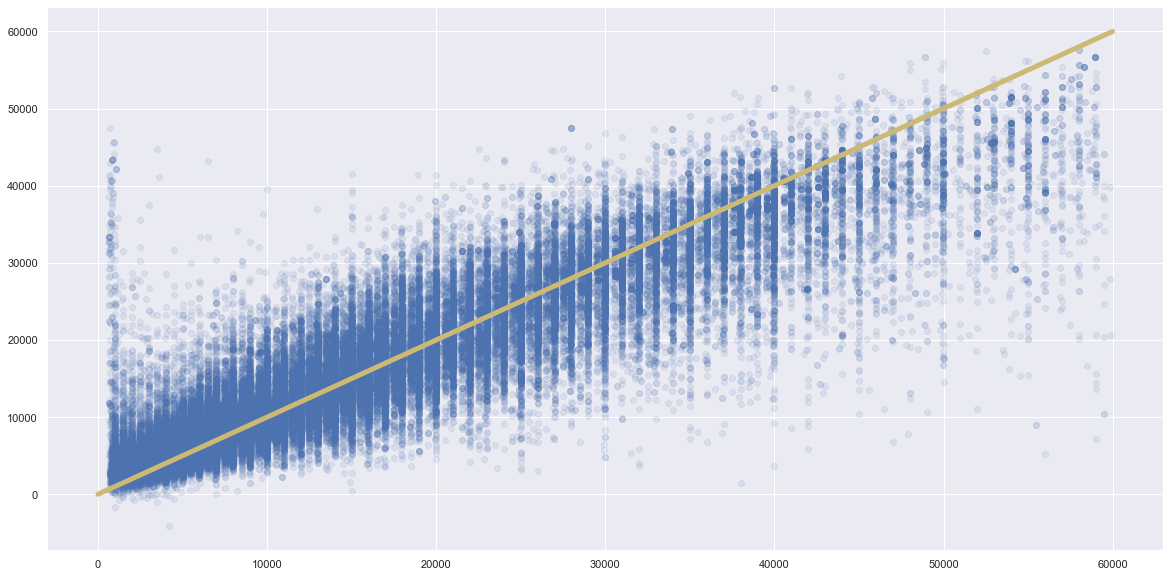

In [123]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용


fig = plt.figure(figsize=(20,10))
plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0, 60000], [0, 60000], 'y-', linewidth=5)
plt.show()


# 가격이 40000달러 이하에서는 잘 맞추는 것 같음
# 이상치들이 여전히 많이 존재하는 것 같음
# 비싼차들은 데이터수가 얼마 안되서 잘 못맞추나 ??

### 문제 17. 에러 값의 히스토그램 확인하기


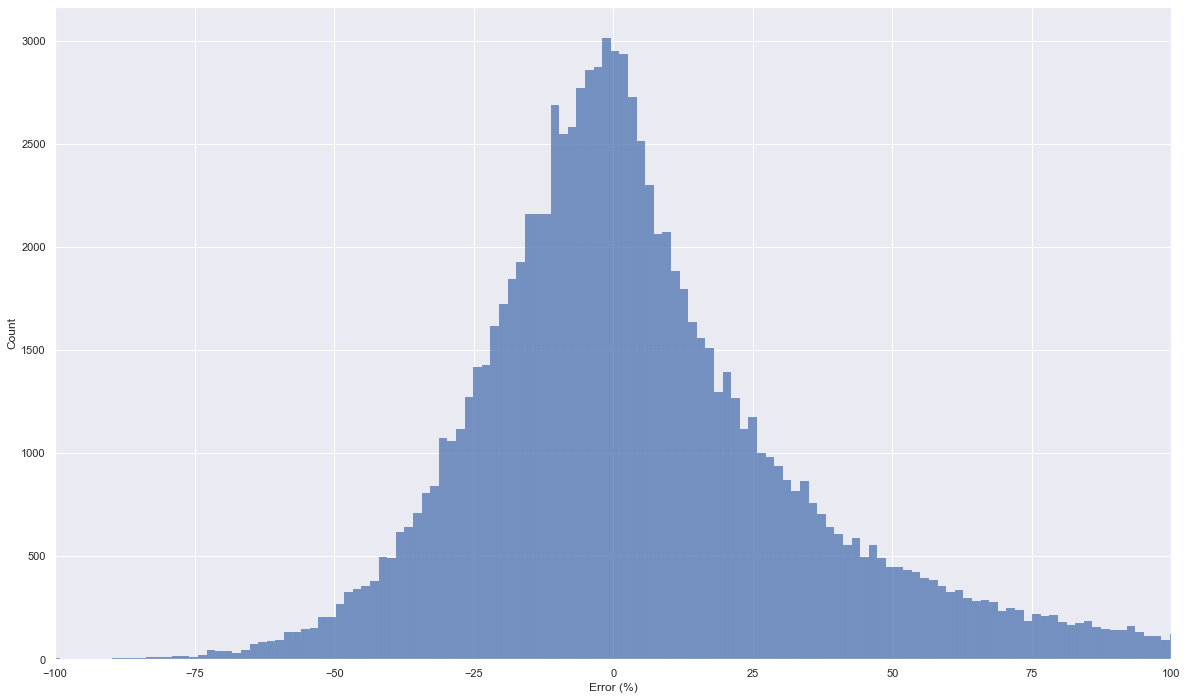

In [138]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100

sns.histplot(err)
plt.xlabel('Error (%)')
plt.xlim(-100, 100)
plt.grid('on')
plt.show()

# 가장 좋은 형태는 0에 일자 봉우리겠지만

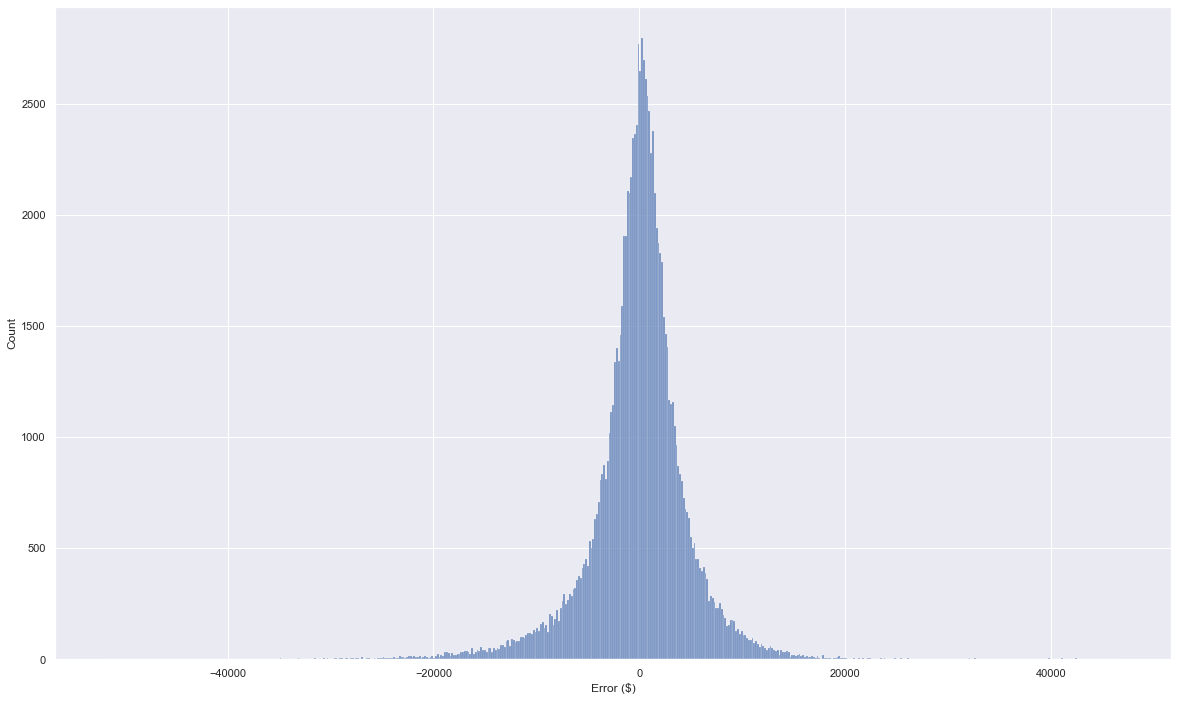

In [140]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = pred - y_test 

sns.histplot(err)
plt.xlabel('Error ($)')
plt.grid('on')
plt.show()

# 실제값이 더 큰경우가 더 많은듯? 